In [1]:
# Clean and reset data to original for 
# re-running the notebook from the start

import os
import shutil
os.chdir('/home/sarah/FourthBrain/Midterm')
path = './Data/train/validation'
files = os.listdir('./Data/train/validation')
for file in files:
    file = os.path.join(path, file)
    shutil.move(file, './Data/train/train')

In [2]:
import numpy as np
import pandas as pd

# bring in training csv
train_csv = pd.read_csv('./Data/train/train.csv')
train_csv.head()

,filename,opacity,diabetic retinopathy,glaucoma,macular edema,macular degeneration,retinal vascular occlusion,normal
0,c24a1b14d253.jpg,0,0,0,0,0,1,0
1,9ee905a41651.jpg,0,0,0,0,0,1,0
2,3f58d128caf6.jpg,0,0,1,0,0,0,0
3,4ce6599e7b20.jpg,1,0,0,0,1,0,0
4,0def470360e4.jpg,1,0,0,0,1,0,0


In [3]:
train_csv.shape

(3435, 8)

In [4]:
# Drop columns we aren't using
train_csv = train_csv.drop(labels=['opacity', 'macular edema',
                                   'macular degeneration',
                                   'retinal vascular occlusion'],
                           axis='columns')
train_csv.shape

(3435, 4)

In [5]:
train_csv.head()

,filename,diabetic retinopathy,glaucoma,normal
0,c24a1b14d253.jpg,0,0,0
1,9ee905a41651.jpg,0,0,0
2,3f58d128caf6.jpg,0,1,0
3,4ce6599e7b20.jpg,0,0,0
4,0def470360e4.jpg,0,0,0


In [6]:
conditions = [
    (train_csv['diabetic retinopathy'] == 1),
    (train_csv['diabetic retinopathy'] == 1),
    (train_csv['diabetic retinopathy'] == 1),
    (train_csv['diabetic retinopathy'] == 0) 
    & (train_csv['glaucoma'] == 0)
    & (train_csv['normal'] == 0),
]
values = [0, 0, 0, 1]
train_csv['other'] = np.select(conditions, values)
train_csv.head()

,filename,diabetic retinopathy,glaucoma,normal,other
0,c24a1b14d253.jpg,0,0,0,1
1,9ee905a41651.jpg,0,0,0,1
2,3f58d128caf6.jpg,0,1,0,0
3,4ce6599e7b20.jpg,0,0,0,1
4,0def470360e4.jpg,0,0,0,1


In [7]:
# Shuffle the data
train_csv = train_csv.sample(frac=1)
print(train_csv.shape)

(3435, 5)


In [8]:
train_csv.describe()

,diabetic retinopathy,glaucoma,normal,other
count,3435.000000,3435.000000,3435.000000,3435.000000
mean,0.219796,0.173799,0.152838,0.459098
std,0.414169,0.378992,0.359884,0.498397
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'diabetic retinopathy'}>,
        <AxesSubplot:title={'center':'glaucoma'}>],
       [<AxesSubplot:title={'center':'normal'}>,
        <AxesSubplot:title={'center':'other'}>]], dtype=object)

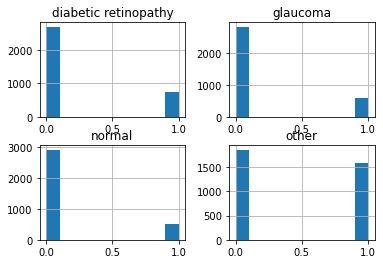

In [9]:
train_csv.hist()

In [10]:
import math
test_portion = math.floor(.3 * train_csv.shape[0])

In [11]:
test_csv = train_csv[0:test_portion]
test_csv.shape

(1030, 5)

In [12]:
test_csv.head()

,filename,diabetic retinopathy,glaucoma,normal,other
3373,559d1f7e2833.jpg,0,0,1,0
929,87d08361bcbc.jpg,0,0,0,1
887,8d454614d370.jpg,0,1,0,0
550,9ff166872a85.jpg,0,0,0,1
2617,6d862a7b4acc.jpg,0,0,0,1


In [13]:
train_csv = train_csv[test_portion:]
train_csv.shape

(2405, 5)

In [14]:
import os
files = os.listdir('./Data/train/train/')
print(len(files))

3437


In [15]:
validation_images = test_csv['filename']
for file in validation_images:
    file = os.path.join('./Data/train/train', file)
    #print(file)
    shutil.move(file, '/home/sarah/FourthBrain/Midterm/Data/train/validation')

In [16]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras import backend as keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import scipy.misc as sc

In [17]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.2,
                                                 width_shift_range=0.05,
                                                 height_shift_range=0.05,
                                                 zoom_range=[0.7,1],
                                                 horizontal_flip=True,
                                                 vertical_flip=True)

In [18]:
#model = tf.keras.applications.InceptionV3(weights='imagenet', 
#                                          pooling='max', 
#                                          classes=4, 
#                                          classifier_activation='softmax')

In [19]:
#inception = tf.keras.Model(inputs=model)

In [21]:
inputs = tf.keras.Input(shape=(224,224,3))
model = tf.keras.applications.VGG16(include_top=False, 
                                    input_tensor=inputs, 
                                    pooling='avg', 
                                    classes=4)
model = model()
model.summary()

58892288/58889256 [==============================] - 1s 0us/step


ValueError: The first argument to `Layer.call` must always be passed.

In [ ]:
import datetime
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
columns = ['diabetic retinopathy', 'glaucoma', 'normal', 'other']
train_gen = datagen.flow_from_dataframe(directory = './Data/train/train',
                                        dataframe = train_csv,
                                        x_col = 'filename',
                                        y_col = columns,
                                        target_size=(224,224),
                                        batch_size=5,
                                        rescale=1./255,
                                        class_mode='other',
                                       )

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0,
                                                 width_shift_range=0.0,
                                                 height_shift_range=0.0,
                                                 horizontal_flip=False,
                                                 vertical_flip=False)
columns = ['diabetic retinopathy', 'glaucoma', 'normal', 'other']
test_gen = datagen.flow_from_dataframe(directory = './Data/train/validation/',
                                        dataframe = test_csv,
                                        x_col = 'filename',
                                        y_col = columns,
                                        target_size=(224,224),
                                        batch_size=5,
                                        rescale=1./255,
                                        class_mode='other',
                                       )

In [ ]:
import time
now = str(time.time())
checkpoint = now + 'vgg16.hdf5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint, monitor='loss',verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
fitting = model.fit_generator(train_gen,
                    steps_per_epoch=10,
                    epochs=100,
                    verbose=1, 
                    validation_data=test_gen,
                    validation_steps = 10,
                    callbacks=[tensorboard_callback, model_checkpoint, early_stopping])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['val_accuracy'])
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy', 'Loss', 'Validation Loss'])
plt.show()

In [ ]:
Y_pred = model.predict(test_gen)

In [ ]:
print(Y_pred)